In [82]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings("ignore")

In [83]:
Data=pd.read_csv("heart.csv")

In [84]:
Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [85]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [86]:
numerical_continuous = []
for column in Data.columns:
    if Data[column].dtypes != 'object':
        if Data[column].nunique() >= 10:
            numerical_continuous.append(column)
numerical_continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

<AxesSubplot:>

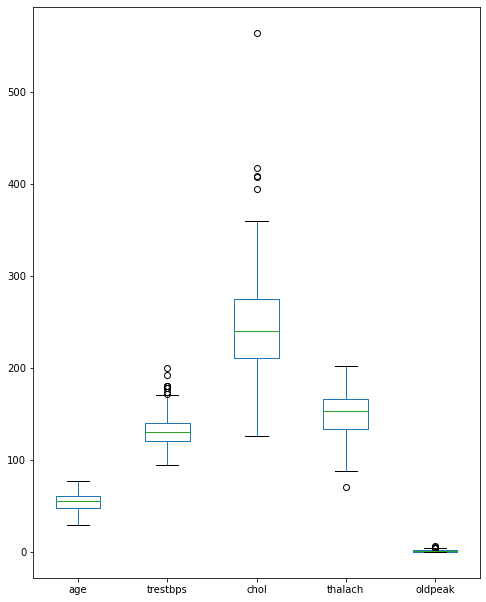

In [87]:
Data[numerical_continuous].plot(kind = 'box', figsize = (8, 10.5))

<AxesSubplot:>

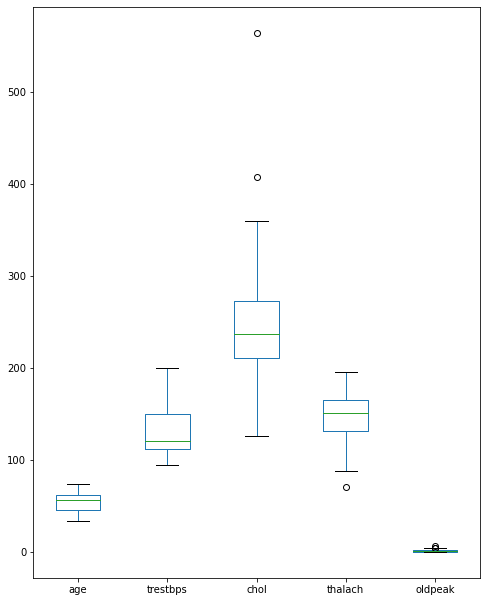

In [88]:
threshold = 0.5
zscore = np.abs(stats.zscore(Data[['trestbps']]))
Data[(zscore > threshold).all(axis=1)][numerical_continuous].plot(kind = 'box', figsize = (8, 10.5))

<AxesSubplot:xlabel='chol'>

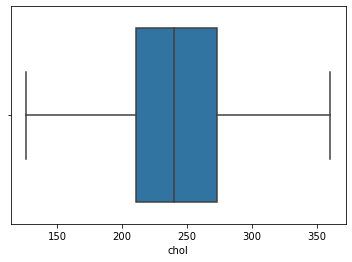

In [89]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(Data.chol)

Data = Data.loc[(Data.chol > lower) & (Data.chol < upper)]

sns.boxplot(Data.chol)

<AxesSubplot:xlabel='trestbps'>

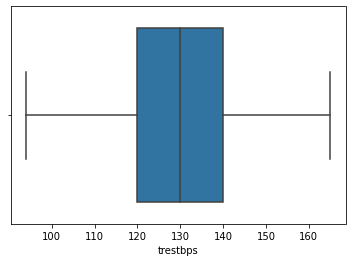

In [90]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(Data.trestbps)

Data = Data.loc[(Data.trestbps > lower) & (Data.trestbps < upper)]

sns.boxplot(Data.trestbps)

<AxesSubplot:xlabel='thalach'>

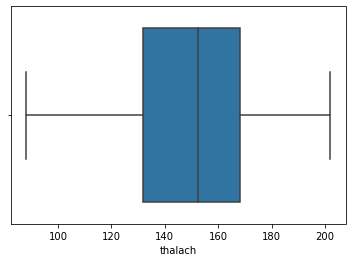

In [91]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(Data.thalach)

Data = Data.loc[(Data.thalach > lower) & (Data.thalach < upper)]

sns.boxplot(Data.thalach)

<AxesSubplot:xlabel='oldpeak'>

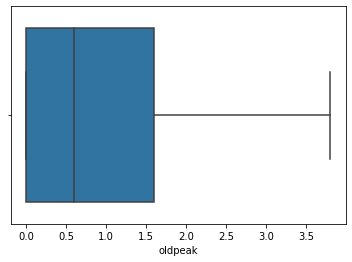

In [92]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(Data.oldpeak)

Data = Data.loc[(Data.oldpeak > lower) & (Data.oldpeak < upper)]

sns.boxplot(Data.oldpeak)

<AxesSubplot:>

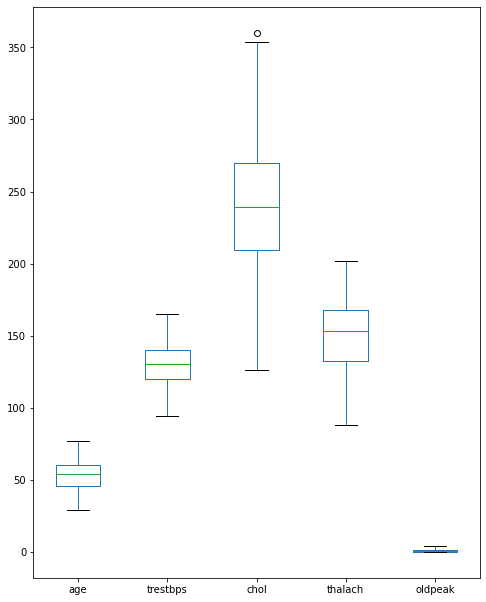

In [93]:
Data[numerical_continuous].plot(kind = 'box', figsize = (8, 10.5))

In [103]:
#Binned the continuous column values apart from the column ‘oldpeak
Data_a=Data
x_a = Data_a.iloc[:, 1:-1]
y_a = Data_a.iloc[:, -1]

from sklearn.model_selection import train_test_split

x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(x_a, y_a, test_size=0.3, random_state=1)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

In [95]:
x_a_train['age_binned'] = pd.qcut(x_a_train.age, q=[0, .25, .50, .75, 1])
x_a_train['trestbps_binned'] = pd.qcut(x_a_train.trestbps, q=[0, .25, .50, .75, 1])
x_a_train['chol_binned'] = pd.qcut(x_a_train.chol, q=[0, .25, .50, .75, 1])
x_a_train['thalach_binned'] = pd.qcut(x_a_train.thalach, q=[0, .25, .50, .75, 1])
x_a_train.drop(columns=['age','trestbps','chol','thalach'], inplace=True)
x_a_train['age'] = transform(x_a_train['age_binned'])
x_a_train['trestbps'] = transform(x_a_train['trestbps_binned'])
x_a_train['chol'] = transform(x_a_train['chol_binned'])
x_a_train['thalach'] = transform(x_a_train['thalach_binned'])
x_a_train.drop(columns=['age','trestbps_binned', 'chol_binned', 'thalach'],inplace=True)
x_a_train.head()

AttributeError: 'DataFrame' object has no attribute 'age'

#Separate the features from the labels and use the most appropriate feature selection 
technique(s)

In [96]:
X=Data.drop('target', axis=1)
y = Data['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((223, 13), (56, 13), (223,), (56,))

Slice the data and scale the features

In [97]:
from sklearn.preprocessing import StandardScaler,RobustScaler, MinMaxScaler

In [98]:
X=Data.iloc[:,1:13]
X

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,3,145,233,1,0,150,0,2.3,0,0,1
1,1,2,130,250,0,1,187,0,3.5,0,0,2
2,0,1,130,204,0,0,172,0,1.4,2,0,2
3,1,1,120,236,0,1,178,0,0.8,2,0,2
4,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,140,241,0,1,123,1,0.2,1,0,3
299,1,3,110,264,0,1,132,0,1.2,1,0,3
300,1,0,144,193,1,1,141,0,3.4,1,2,3
301,1,0,130,131,0,1,115,1,1.2,1,1,3


In [99]:
X = pd.Data(RobustScaler().fit_transform(X), columns=X.columns)

AttributeError: module 'pandas' has no attribute 'Data'

Identify the data if the data is balanced. If not, sample the data using the most appropriate
method keeping the size of the data in mind

In [102]:
pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()


SyntaxError: invalid syntax (<ipython-input-102-d86bf407bb39>, line 1)